##  PREPROCESSING & MODELING

THis is where after the data has been preprocessed,  machine learning models will be built, tested and the best performing model to be implemented during deployment

In [8]:
# Load the clean dataset

import pandas as pd

data = pd.read_csv('/Users/RyanMburu/Desktop/DS Projects/Thyroid Disease Detector/Datasets/clean_hypothyroid2.csv')
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,0,41,F,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,1,70,F,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,2,80,F,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,3,66,F,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,4,68,M,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


In [9]:
# Drop the redundant index column
data.drop(columns=('Unnamed: 0'), axis=1, inplace=True)

data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


The project is a classification problem, as the output is YES/NO or 1/2

We need to perform preprocessing

## Data Preprocessing

### 1. Feature Encoding

This is where categorical data that is in string form (t/f, etc) will be transformed to numerical data

In [5]:
# will perform label encoding on the categorical data all over the dataset

# Will make use of codes

codes = {'f' : 0, 't' : 1}
codes


{'f': 0, 't': 1}

In [10]:
# Apply on every column necessary

data['on thyroxine'] = data['on thyroxine'].replace(codes)
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,0,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,0,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,0,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,0,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,0,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,19,F,0,f,f,f,f,f,f,f,...,f,f,f,8.80,2.7,108.0,1.11,97.0,other,1
2745,68,F,0,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,0
2746,74,F,0,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,0
2747,72,M,0,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,0


In [11]:
# Function that inputs codes per indicated column

def label_encoder(column):
    data[column] = data[column].replace(codes)

In [13]:
label_encoder('query on thyroxine')

In [15]:
# Copy paste the rest of the columns and run at once
label_encoder('on antithyroid medication')
label_encoder('sick')
label_encoder('pregnant')
label_encoder('thyroid surgery')
label_encoder('I131 treatment')
label_encoder('query hypothyroid')
label_encoder('query hyperthyroid')
label_encoder('lithium')
label_encoder('goitre')
label_encoder('tumor')
label_encoder('hypopituitary')
label_encoder('psych')


In [17]:
# Will do the same process on gender column

# This is important so as to avoid using alot of libraries,and practice my craft as a programmer

codes = {'F' : 0, 'M' : 1, 'NS' : 2}

data['sex'] = data['sex'].replace(codes)

In [19]:
# Drop referal source column, as the hospital you were refered from cannot influence whether you have an ailment or not

data.drop(columns = ('referral source'), axis = 1, inplace = True)

In [20]:
# Output final dataset
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,output
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,0
3,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8.80,2.7,108.0,1.11,97.0,1
2745,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.00,2.1,124.0,1.08,114.0,0
2746,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.10,1.8,112.0,1.07,105.0,0
2747,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,2.0,82.0,0.94,87.0,0


### 2. Feature Reduction / Feature Selection

 - Disclaimer :  Decided to do reduction before normalization as when conducting research, I saw that decision tree models are normally not affected by the scale of the inputs, unlike distance-based models such as K-Nearest Neighbours models and SVM's

Feature selection is where we will choose the most important features for our modelling phase

Will use Random Forest and check for feature importance as a trick to see which features contributed the most to prediction

In [23]:
# Will split the data into arrays of data i.e X and y using the traintest split module
from sklearn.model_selection import train_test_split
# X are the features
# y is the label
X = data.loc[:, 'age' : 'FTI'].values
y = data['output'].values
# Will split X and y into training data and testing data of 80% and 20% splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test


array([[ 75.  ,   0.  ,   0.  , ..., 120.  ,   1.03, 117.  ],
       [ 63.  ,   2.  ,   0.  , ...,  89.  ,   1.04,  85.  ],
       [ 53.  ,   1.  ,   0.  , ..., 104.  ,   0.81, 128.  ],
       ...,
       [ 21.  ,   0.  ,   0.  , ..., 130.  ,   1.04, 124.  ],
       [ 73.  ,   0.  ,   0.  , ..., 113.  ,   0.74, 153.  ],
       [ 25.  ,   0.  ,   0.  , ..., 152.  ,   1.5 , 102.  ]])

In [25]:
# Will quickly build a random forest model and check for feature importance

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500, max_depth = 8, min_samples_split = 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=30, n_estimators=500)

Text(0.5, 1.0, 'A graph showing the most important features in the dataset ')

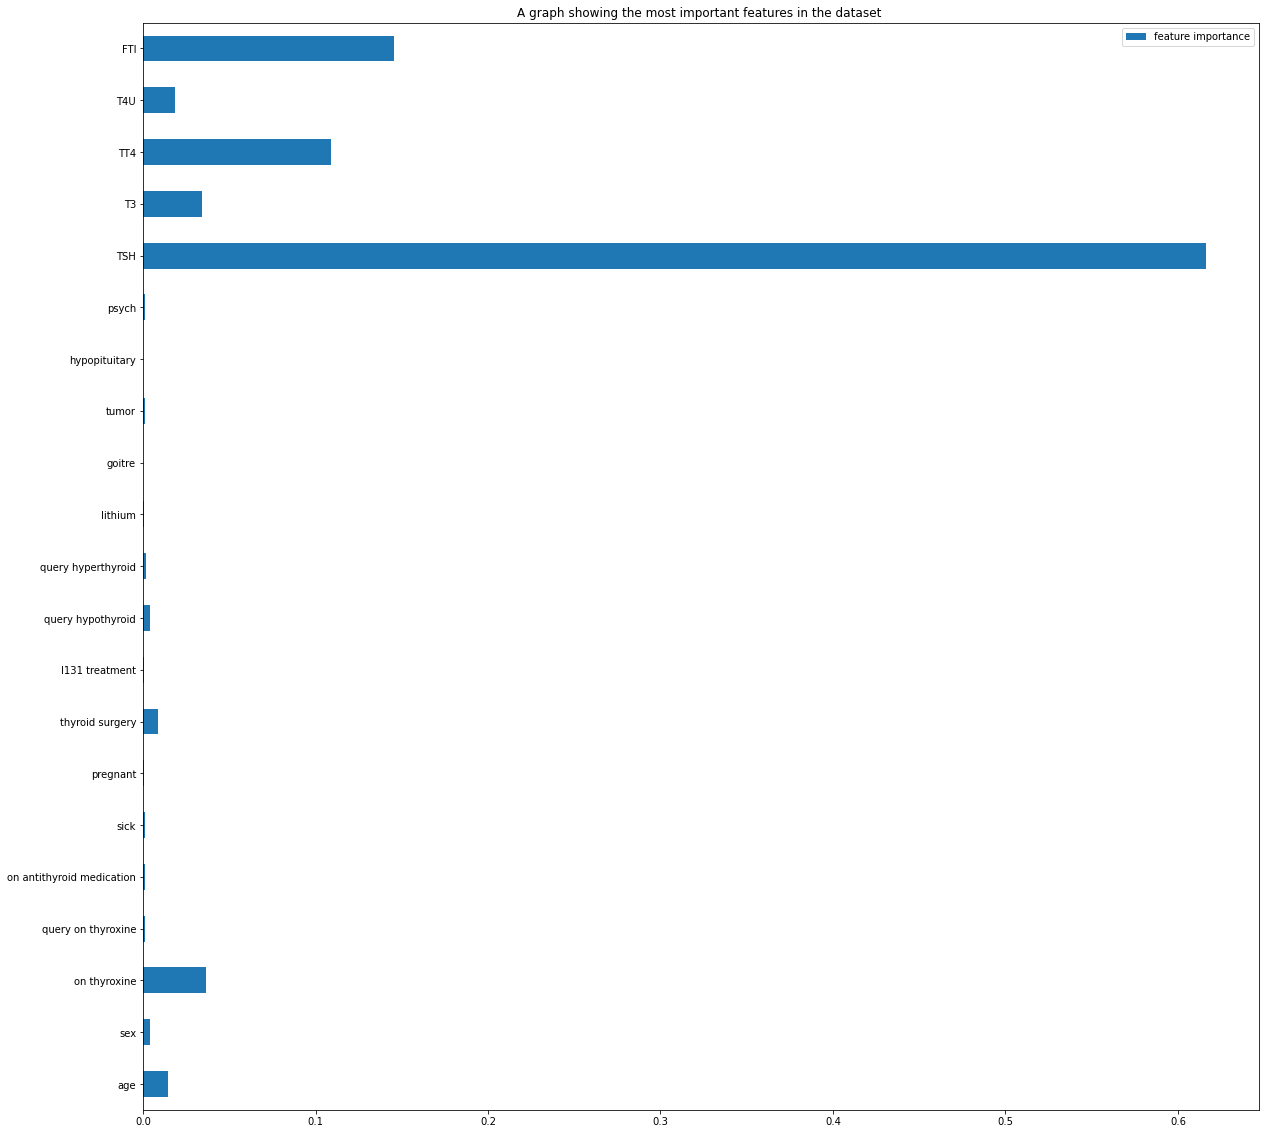

In [30]:
# Will check for feature importance, as thats our main priority
X_columns = data.loc[:, 'age' : 'FTI']
df_FI = pd.DataFrame(forest.feature_importances_, X_columns.columns, columns = ['feature importance'])

# Will first import plotting module
import matplotlib.pyplot as plt
# Plot the dataframe as a horizontal bar graph of its values
df_FI.plot(kind = 'barh', figsize = (20, 20))
plt.title('A graph showing the most important features in the dataset ')

The most important features as per the Feature Importance plot are : 
1. FTI
2. TFU
3. TT4
4. T3
5. TSH (most important)
6. Thyroid Surgery
7. On Thyroxine
8. Age

Will go ahead and extract a new dataset for modelling only using the said features

In [35]:
# New dataset with reduced features

data_modeling = data[['age', 'on thyroxine', 'thyroid surgery', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'output']]
data_modeling

,age,on thyroxine,thyroid surgery,TSH,T3,TT4,T4U,FTI,output
0,41,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80,0,0,2.20,0.6,80.0,0.70,115.0,0
3,66,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68,0,0,2.40,1.6,83.0,0.89,93.0,0
...,...,...,...,...,...,...,...,...,...
2744,19,0,0,8.80,2.7,108.0,1.11,97.0,1
2745,68,0,0,1.00,2.1,124.0,1.08,114.0,0
2746,74,0,0,5.10,1.8,112.0,1.07,105.0,0
2747,72,0,0,0.70,2.0,82.0,0.94,87.0,0


In [36]:
# Export modeling dataset
data_modeling.to_csv('modeling_hypothyroid.csv')

### 3. Feature normalization / Scaling

This is when the data is in different scales eg age and sex. Age ranges until 100 whereas sex is 1 and 0

This often leads to machine learning models performing poorly.

In [42]:
# Will import MinMaxScaler to have all data range from 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Will split the data to X and y then scale data in X
X = data_modeling.loc[:, 'age' : 'FTI'].values
y = data_modeling['output'].values

scaled_X = scaler.fit_transform(X)
scaled_X

array([[0.43010753, 0.        , 0.        , ..., 0.28738318, 0.47593583,
        0.27226463],
       [0.74193548, 0.        , 0.        , ..., 0.13785047, 0.3315508 ,
        0.17302799],
       [0.84946237, 0.        , 0.        , ..., 0.18224299, 0.24064171,
        0.28753181],
       ...,
       [0.78494624, 0.        , 0.        , ..., 0.25700935, 0.43850267,
        0.26208651],
       [0.76344086, 0.        , 0.        , ..., 0.18691589, 0.36898396,
        0.21628499],
       [0.67741935, 0.        , 0.        , ..., 0.22663551, 0.43850267,
        0.22900763]])

The X values have been normalized. They are now all in a range of 0 - 1

### 4. Data Splitting

This is where the data is split into two or sometimes 3 sets

1. Training set (80% of the data) -  this is the data that will train the model
2. Testing set (20%) - This will be used during testing the model's accuracy

In [48]:
# Will use the train test module that was used when building the Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 42)

# Length of training data
print(X_train.shape)

# Length of testing data
print(X_test.shape)

(2199, 8)
(550, 8)


The splitting is a success, where the training split has 2199 records of data and the testing split has 550